<a href="https://colab.research.google.com/github/TarekHasan011/Simulation-and-Modeling-Laboratory/blob/main/CSI_424(A)_Simulation_%26_Modeling_Laboratory_Assignment_2_011_181_076_Md_Tarek_Hasan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem name: Pure pursuit problem
**Problem description:**
A fighter aircraft sights an enemy bomber and flies directly toward it, in order to catch up and destroy it. We have to determine whether the fighter aircraft can catch/destroy the enemy bomber or not within a given time.


In [ ]:
import math
def euclidean_distance(x1, y1, x2, y2):
    return math.sqrt(((x1-x2) ** 2) + ((y1-y2) ** 2))

In [ ]:
import matplotlib.pyplot as plt

def task_one(X_fighter, Y_fighter, X_enemy, Y_enemy, V_fighter, V_enemy, attack_distance, time_limit, deltaT):
    caught_distance = math.inf
    
    fighter_X = []
    fighter_Y = []

    enemy_X = []
    enemy_Y = []

    for i in range(0, time_limit+1, deltaT):
        fighter_X.append(X_fighter)
        fighter_Y.append(Y_fighter)

        enemy_X.append(X_enemy)
        enemy_Y.append(Y_enemy)

        D = euclidean_distance(X_fighter, Y_fighter, X_enemy, Y_enemy)
        if  D <= attack_distance:
            # print(i)
            caught_distance = D
            break
        X_fighter = X_fighter + (V_fighter * deltaT * ((X_enemy - X_fighter) / D))
        Y_fighter = Y_fighter + (V_fighter * deltaT * ((Y_enemy - Y_fighter) / D))
        
        X_enemy = X_enemy - (V_enemy*deltaT)
    
    plt.clf()
    plt.scatter(enemy_X,enemy_Y,color='Lime')
    plt.scatter(fighter_X,fighter_Y,color='red')
    plt.show()

    # print(f'Fighter: ({X_fighter}, {Y_fighter}) Enemy: ({X_enemy}, {Y_enemy})')

    if caught_distance < math.inf:
        print(f'defense A attacked enemy B with distance {round(caught_distance,2)} m.')
    else:
        print('defense A didn’t attack enemy B.')


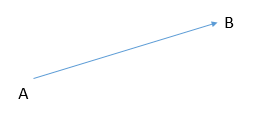

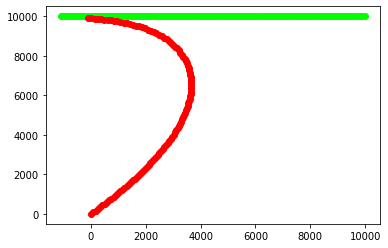

defense A attacked enemy B with distance 997.17 m.


In [ ]:
task_one(0,0,10000,10000,60,50,1000,300,2)

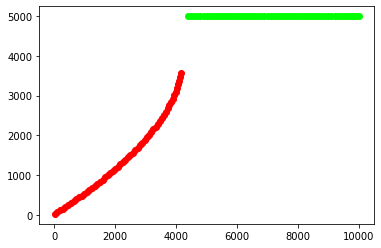

defense A attacked enemy B with distance 1452.84 m.


In [ ]:
task_one(10,20,10000,5000,50,50,1500,600,2)

In [ ]:
import matplotlib.pyplot as plt

def task_two(X_A, Y_A, X_B, Y_B, X_C, Y_C, X_D, Y_D, V_A, V_B, V_C, V_D, attack_distance, time_limit, deltaT):
    caught_distance = (math.inf,'','')

    A_X = []
    A_Y = []

    B_X = []
    B_Y = []

    C_X = []
    C_Y = []

    D_X = []
    D_Y = []

    for i in range(0, time_limit+1, deltaT):
        A_X.append(X_A)
        A_Y.append(Y_A)

        B_X.append(X_B)
        B_Y.append(Y_B)

        C_X.append(X_C)
        C_Y.append(Y_C)

        D_X.append(X_D)
        D_Y.append(Y_D)

        D_AtoB = euclidean_distance(X_A, Y_A, X_B, Y_B)
        D_BtoC = euclidean_distance(X_B, Y_B, X_C, Y_C)
        D_CtoD = euclidean_distance(X_C, Y_C, X_D, Y_D)

        if D_AtoB <= attack_distance:
            caught_distance = (D_AtoB,'A','B')
            break
        if D_BtoC <= attack_distance:
            caught_distance = (D_BtoC,'B','C')
            break
        if D_CtoD <= attack_distance:
            caught_distance = (D_CtoD,'C','D')
            break

        X_A += ((V_A*deltaT) * ((X_B - X_A) / D_AtoB)) 
        Y_A += ((V_A*deltaT) * ((Y_B - Y_A) / D_AtoB))

        X_B += ((V_B*deltaT) * ((X_C - X_B) / D_BtoC)) 
        Y_B += ((V_B*deltaT) * ((Y_C - Y_B) / D_BtoC)) 

        X_C += ((V_C*deltaT) * ((X_D - X_C) / D_CtoD)) 
        Y_C += ((V_C*deltaT) * ((Y_D - Y_C) / D_CtoD)) 

        X_D -= (V_D * deltaT)
    plt.clf()
    plt.scatter(D_X, D_Y, color='Magenta')
    plt.scatter(C_X, C_Y, color='blue')
    plt.scatter(B_X, B_Y, color='Lime')
    plt.scatter(A_X, A_Y, color='red')
    plt.show()

    
    if caught_distance[0] < math.inf:
        print(f'{caught_distance[1]} attacked {caught_distance[2]} with position {round(caught_distance[0],2)} m')
    else:
        print('No attack occurred....')


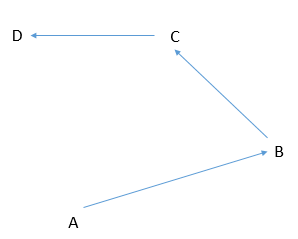

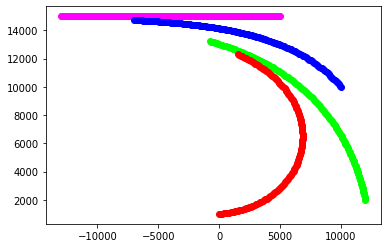

No attack occurred....


In [ ]:
task_two(0,1000,12000,2000,10000,10000,5000,15000,60,60,60,60,1000,300,2)